In [1]:
import sqlite3
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
conn = sqlite3.connect('testClaims_hu.db')
df = pd.read_sql('select * from highUtilizationPredictionV2wco', conn)
# create dummies for race
race = pd.get_dummies(df['race'], dummy_na=False)
df=pd.concat([df,race], axis=1)
# split into training and testing
tr, ts = train_test_split(df, test_size=0.2)
# create list of input attributes
cls = list(df.columns)
cls.remove('index')
cls.remove('race')
cls.remove('patient_id')
cls.remove('claimCount')
cls.remove('HighUtilizationY2')

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [4]:
lr = LogisticRegression()
lr.fit(tr[cls], tr['HighUtilizationY2'])
probs = lr.predict_proba(ts[cls])[:,1]
clas = lr.predict(ts[cls])
fpr,tpr,thresholds = roc_curve(ts['HighUtilizationY2'],probs)
print('auc: ',auc(fpr,tpr))
print('accuracy : ',accuracy_score(clas,ts['HighUtilizationY2']))

auc:  0.8086524290096732
accuracy :  0.9372705153727051


In [5]:
dist = []
acc = []
for cnt in range(0,300,10):
    tt = ts[(ts['claimCount'] >= cnt) & (ts['claimCount'] < cnt + 10)]
    dist.append( lr.predict_proba(tt[cls])[:,1].mean())
    clas = lr.predict(tt[cls])
    acc.append(accuracy_score(clas,tt['HighUtilizationY2']))

<BarContainer object of 30 artists>

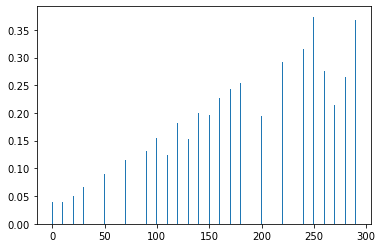

In [6]:
plt.bar(range(0,300,10), dist)

<BarContainer object of 30 artists>

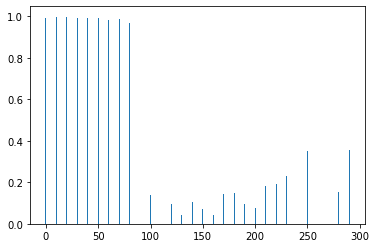

In [7]:
plt.bar(range(0,300,10),acc)

In [8]:
rf = RandomForestClassifier( n_jobs=-1)
rf.fit(tr[cls], tr['HighUtilizationY2'])
probs =rf.predict_proba(ts[cls])[:,1]
fpr,tpr,thresholds = roc_curve(ts['HighUtilizationY2'],probs)
auc(fpr,tpr)
clas = rf.predict(ts[cls])
fpr,tpr,thresholds = roc_curve(ts['HighUtilizationY2'],probs)
print('auc: ',auc(fpr,tpr))
print('accuracy : ',accuracy_score(clas,ts['HighUtilizationY2']))

auc:  0.7942548172913924
accuracy :  0.9391285113912851


In [9]:
dist = []
acc = []
for cnt in range(0,300,10):
    tt = ts[(ts['claimCount'] >= cnt) & (ts['claimCount'] < cnt + 10)]
    dist.append(rf.predict_proba(tt[cls])[:,1].mean())
    clas = rf.predict(tt[cls])
    acc.append(accuracy_score(clas,tt['HighUtilizationY2']))

<BarContainer object of 30 artists>

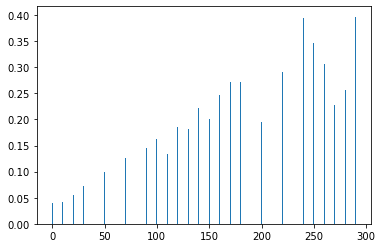

In [10]:
plt.bar(range(0,300,10), dist)

<BarContainer object of 30 artists>

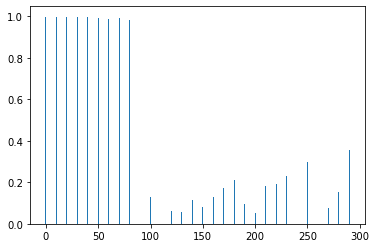

In [11]:
plt.bar(range(0,300,10),acc)

(array([46757., 19701.,  9936.,  5206.,  2891.,  1762.,  1133.,   762.,
          504.,   402.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <a list of 10 Patch objects>)

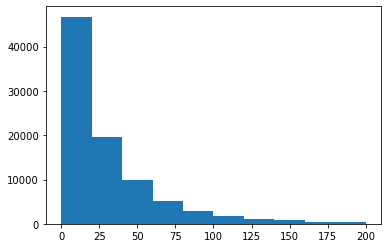

In [12]:
plt.hist(tr[tr['claimCount']<=200]['claimCount'], bins=10)

# 1. Experiment with claims close to 100 claims high utilization boundary. FOr example you can ignore claims in +/- 10 range and see if that affects quality of models. Also investigate accuracy of models by stratifying test data by number of claims. Plot accuracy per number of claims. 

In [13]:
df1= tr[tr['claimCount']< 90 ] 

In [14]:
df2 = tr[tr['claimCount']>110 ] 

In [15]:
tr1 = [df1, df2]
train_new = pd.concat(tr1)

In [16]:
train_new.shape[0]

88078

In [17]:
#tr1, ts1 = train_test_split(result, test_size=0.2)

(array([21800.,  4623.,  4966.,  6604.,  4585.,  4179.,  5152.,  3385.,
         3037.,  3591.,  2390.,  2146.,  2624.,  1718.,  1526.,  1733.,
         1200.,  1135.,  1307.,   837.,   786.,  1018.,   660.,   598.,
          723.,   496.,   441.,     0.,     0.,     0.,     0.,     0.,
            0.,   247.,   197.,   208.,   280.,   185.,   168.,   210.,
          148.,   142.,   179.,   122.,   125.,   141.,   104.,    91.,
          126.,    79.,    73.,    96.,    66.,    64.,    89.,    56.,
           56.,    87.,    46.,    68.]),
 array([  0.        ,   3.33333333,   6.66666667,  10.        ,
         13.33333333,  16.66666667,  20.        ,  23.33333333,
         26.66666667,  30.        ,  33.33333333,  36.66666667,
         40.        ,  43.33333333,  46.66666667,  50.        ,
         53.33333333,  56.66666667,  60.        ,  63.33333333,
         66.66666667,  70.        ,  73.33333333,  76.66666667,
         80.        ,  83.33333333,  86.66666667,  90.        ,
      

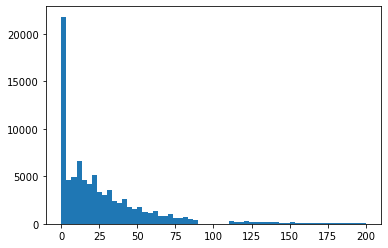

In [18]:
plt.hist(train_new[train_new['claimCount']<=200]['claimCount'], bins=60)

In [19]:
lr = LogisticRegression()
lr.fit(train_new[cls], train_new['HighUtilizationY2'])
probs = lr.predict_proba(ts[cls])[:,1]
clas = lr.predict(ts[cls])
fpr,tpr,thresholds = roc_curve(ts['HighUtilizationY2'],probs)
print('auc: ',auc(fpr,tpr))
print('accuracy : ',accuracy_score(clas,ts['HighUtilizationY2']))

auc:  0.8054676778804932
accuracy :  0.9374032293740323


In [20]:
dist = []
accu =[]
for cnt in range(0,90,10):
    tt = train_new[(train_new['claimCount'] >= cnt) & (train_new['claimCount'] < cnt + 10)]
    dist.append(lr.predict_proba(tt[cls])[:,1].mean())
    clas = lr.predict(tt[cls])
    accu.append(accuracy_score(clas,tt['HighUtilizationY2']))
for cnt in range(110,300,10):
    tt = train_new[(train_new['claimCount'] >= cnt) & (train_new['claimCount'] < cnt + 10)]
    dist.append(lr.predict_proba(tt[cls])[:,1].mean())
    clas = lr.predict(tt[cls])
    accu.append(accuracy_score(clas,tt['HighUtilizationY2']))

<BarContainer object of 28 artists>

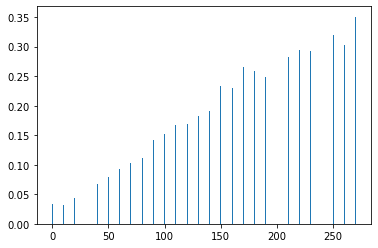

In [21]:
plt.bar(range(0,280,10), dist)

<BarContainer object of 28 artists>

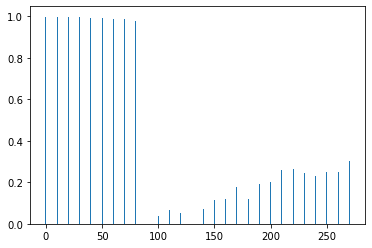

In [22]:
plt.bar(range(0,280,10), accu)

In [23]:
rf = RandomForestClassifier( n_jobs=-1)
rf.fit(train_new[cls], train_new['HighUtilizationY2'])
probs =rf.predict_proba(ts[cls])[:,1]
fpr,tpr,thresholds = roc_curve(ts['HighUtilizationY2'],probs)
auc(fpr,tpr)
clas = rf.predict(ts[cls])
fpr,tpr,thresholds = roc_curve(ts['HighUtilizationY2'],probs)
print('auc: ',auc(fpr,tpr))
print('accuracy : ',accuracy_score(clas,ts['HighUtilizationY2']))

auc:  0.7940188394540535
accuracy :  0.9393054633930547


In [24]:
dist = []
accu =[]
for cnt in range(0,90,10):
    tt = train_new[(train_new['claimCount'] >= cnt) & (train_new['claimCount'] < cnt + 10)]
    dist.append(rf.predict_proba(tt[cls])[:,1].mean())
    clas = rf.predict(tt[cls])
    accu.append(accuracy_score(clas,tt['HighUtilizationY2']))
for cnt in range(110,300,10):
    tt = train_new[(train_new['claimCount'] >= cnt) & (train_new['claimCount'] < cnt + 10)]
    dist.append(rf.predict_proba(tt[cls])[:,1].mean())
    clas = rf.predict(tt[cls])
    accu.append(accuracy_score(clas,tt['HighUtilizationY2']))

<BarContainer object of 28 artists>

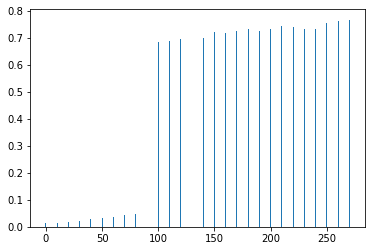

In [25]:
plt.bar(range(0,280,10), dist)

<BarContainer object of 28 artists>

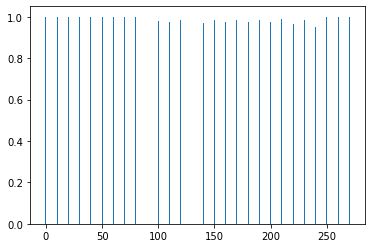

In [26]:
plt.bar(range(0,280,10), accu)

# 2. Conduct sensitivity analysis for the testClaims data for predicting high utilization.

In [27]:
x = df['age'].unique()

In [28]:
x.sort()

In [29]:
x

array([65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       82, 83, 84, 85, 86, 87, 88, 89, 90], dtype=int64)

In [30]:
key = df['age'].value_counts().sort_index().index
value = df['age'].value_counts().sort_index().values

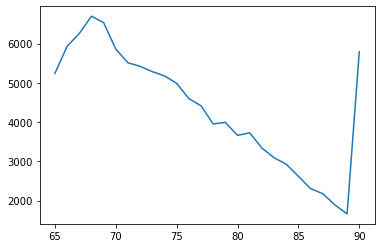

In [31]:
plt.plot(key, value)

MOST OF THE PERSON ARE AGED BETWEEN 65 TO 70.
THE INTERESTING THING TO NOTICE IS THERE IS SUDDEN SPIKE IN DATA AFTER 90, THE PERSON ABOVE 90 IS GENERALISED TO 90.

In [32]:
training_prob = []
testing_prob = []
train_auc = []
test_auc = []
train_accuracy = []
test_accuracy = []
for a in list(x):
    ts_sen = ts[ts['age'] == a]
    tr_sen = tr[tr['age'] == a]
    testing_prob.append( rf.predict_proba(ts_sen[cls])[:,1].mean())
    training_prob.append( rf.predict_proba(tr_sen[cls])[:,1].mean())

    probs =rf.predict_proba(ts_sen[cls])[:,1]
    fpr,tpr,thresholds = roc_curve(ts_sen['HighUtilizationY2'],probs)
    test_auc.append(auc(fpr,tpr))
    probs =rf.predict_proba(tr_sen[cls])[:,1]
    fpr,tpr,thresholds = roc_curve(tr_sen['HighUtilizationY2'],probs)
    train_auc.append(auc(fpr,tpr))
    
    clas_train = rf.predict(tr_sen[cls])
    clas_test = rf.predict(ts_sen[cls])
    
    train_accuracy.append(accuracy_score(clas_train,tr_sen['HighUtilizationY2']))
    test_accuracy.append(accuracy_score(clas_test,ts_sen['HighUtilizationY2']))

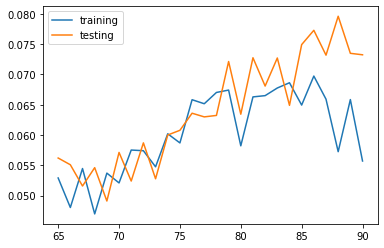

In [33]:
plt.plot(list(x),training_prob)
plt.plot(list(x),testing_prob)
plt.legend(['training','testing'])

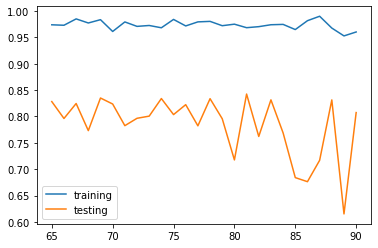

In [34]:
plt.plot(list(x),train_auc)
plt.plot(list(x),test_auc)
plt.legend(['training','testing'])

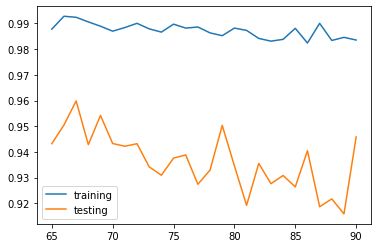

In [35]:
plt.plot(list(x),train_accuracy)
plt.plot(list(x),test_accuracy)
plt.legend(['training','testing'])

In [36]:
train_prob = []
test_prob = []


for age in list(x):
    train = pd.DataFrame(tr)
    train['age'] = age
    test = pd.DataFrame(ts)
    test['age'] = age
    train_prob.append(rf.predict_proba(train[cls])[:,1].mean())
    test_prob.append(rf.predict_proba(test[cls])[:,1].mean())

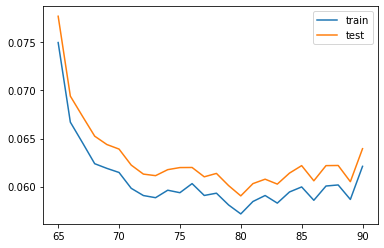

In [37]:
plt.plot(list(x),train_prob,label = 'train')
plt.plot(list(x),test_prob,label='test')
plt.legend()

GRAPH SHOWS THAT PEOPLE WITH AGE 65 IS HIGH PROBABILITY OF UTILIZING INSURANE, AS AGE INCREASES PROBABILITY DECREASES.

In [38]:
#creating random person
data = []
for a in list(x):
    for i in range(1,1000):
        age = a

        # randomly select ELIX codes
        ELIX = [np.random.randint(2) for i in range(29)]

        # randomly select procedures
        G = [np.random.randint(2) for i in range(22)]

        # randomly select drug counts
        drugs = [np.random.randint(13) for i in range(12)] 

        # zero all races
        A = 0
        AmN = 0
        B = 0
        H = 0
        O = 0
        U = 0
        W = 0
        # and randomly select race
        r = np.random.randint(7)
        if r == 0:
            A = 1
        if r == 1:
            AmN = 1
        if r == 2:
            B = 1
        if r == 3:
            H = 1
        if r == 4:
            O = 1
        if r == 5:
            U = 1
        if r == 6:
            W = 1    
        d = [age] + ELIX + G + drugs + [A, AmN, B, H, O, U, W]
        data.append(d)

In [39]:
Y = rf.predict_proba(data)[:,1]

In [40]:
X = np.array(data)[:,0]

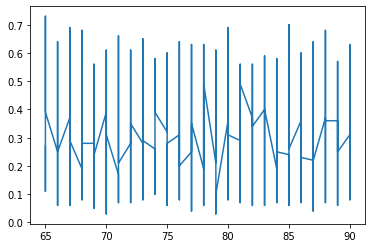

In [41]:
plt.plot(X,Y)

In [42]:
ddd = pd.DataFrame(X, columns=['age'])

In [43]:
ddd['prob'] = Y

In [44]:
YY = ddd.groupby('age').mean()

In [45]:
XX = range(65,91)

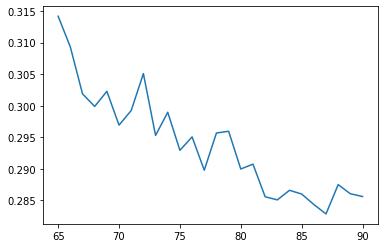

In [46]:
plt.plot(XX,YY)

In [47]:
data = pd.DataFrame(data)
data_acc = []
for age in x:
    train = data[data[0]==age]
    data_acc.append(rf.predict_proba(train)[:,1].mean())
data_acc

[0.3141841841841842,
 0.30930930930930933,
 0.3018818818818819,
 0.2998898898898899,
 0.3022822822822823,
 0.2969269269269269,
 0.2992492492492492,
 0.30509509509509514,
 0.2952952952952953,
 0.29896896896896896,
 0.292932932932933,
 0.295065065065065,
 0.2897797797797798,
 0.29567567567567565,
 0.2959559559559559,
 0.28996996996996993,
 0.29074074074074074,
 0.28557557557557556,
 0.285075075075075,
 0.2865965965965966,
 0.286006006006006,
 0.28434434434434436,
 0.2828528528528528,
 0.28749749749749753,
 0.28604604604604605,
 0.28561561561561566]

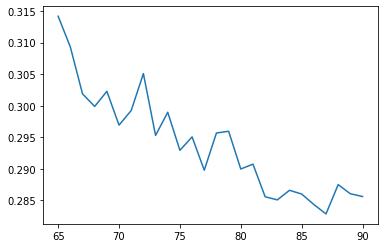

In [48]:
plt.plot(list(x),data_acc)

In [49]:
y = df['race'].unique()

In [50]:
y.sort()

In [51]:
y

array(['A', 'Am.N', 'B', 'H', 'O', 'U', 'W'], dtype=object)

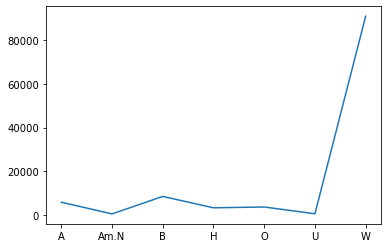

In [52]:
key = df['race'].value_counts().sort_index().index
values = df['race'].value_counts().sort_index().values
plt.plot(key,values)

In [53]:
prob_race = []
for race in list(y):
    train_race = tr[tr[race]==1]
    prob_race.append(rf.predict_proba(train_race[cls])[:,1].mean())
    

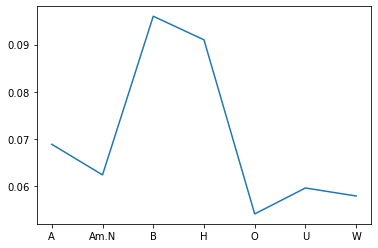

In [54]:
plt.plot(list(y),prob_race)

Race does not has impact for prediction

# 3. Select randomly two patients from testmcalims test set. Conduct local sensitivity analysis for the prediction on these patients.

In [55]:
rf = RandomForestClassifier()
rf.fit(tr[cls],tr['HighUtilizationY2'])
p = rf.predict_proba(ts[cls])[:]

In [56]:
p = rf.predict_proba(ts[cls])

In [57]:
np.where(p[:,1] > 0.7)

(array([  304,  1033,  1108,  2501,  2531,  2692,  3025,  3400,  3522,
         3828,  3938,  4427,  5506,  5663,  5717,  6166,  7724,  7790,
         8333,  8975, 10499, 10936, 11055, 11268, 11454, 12282, 12315,
        12737, 13575, 14645, 14725, 14870, 15245, 15307, 15454, 16344,
        16469, 17475, 17502, 18921, 19020, 19759, 20376, 21734, 22392,
        22477, 22520], dtype=int64),)

In [58]:
p[13070,:]

array([1., 0.])

In [59]:
p[20999,:]

array([0.9, 0.1])

In [60]:
test_case1 = ts.iloc[13070]
test_case2 = ts.iloc[20999]

In [61]:
binary_cols = {}
numeric_cols = {}
for c in cls:
    cnt = len(tr[c].value_counts().index)
    mnv = tr[c].min()
    mxv = tr[c].max()
    if cnt > 2:
        avg = tr[c].mean()
        std = tr[c].std()
        #print(c, cnt, mnv, mxv, avg, std)
        numeric_cols[c] = (cnt, mnv, mxv, avg, std)
    elif cnt == 2:
        binary_cols[c] = (cnt, mnv, mxv)

In [62]:
binary_cols

{'ELIX1': (2, 0, 1),
 'ELIX2': (2, 0, 1),
 'ELIX3': (2, 0, 1),
 'ELIX4': (2, 0, 1),
 'ELIX5': (2, 0, 1),
 'ELIX6': (2, 0, 1),
 'ELIX7': (2, 0, 1),
 'ELIX8': (2, 0, 1),
 'ELIX9': (2, 0, 1),
 'ELIX10': (2, 0, 1),
 'ELIX11': (2, 0, 1),
 'ELIX12': (2, 0, 1),
 'ELIX13': (2, 0, 1),
 'ELIX14': (2, 0, 1),
 'ELIX15': (2, 0, 1),
 'ELIX16': (2, 0, 1),
 'ELIX17': (2, 0, 1),
 'ELIX18': (2, 0, 1),
 'ELIX19': (2, 0, 1),
 'ELIX20': (2, 0, 1),
 'ELIX21': (2, 0, 1),
 'ELIX22': (2, 0, 1),
 'ELIX23': (2, 0, 1),
 'ELIX24': (2, 0, 1),
 'ELIX25': (2, 0, 1),
 'ELIX26': (2, 0, 1),
 'ELIX27': (2, 0, 1),
 'ELIX28': (2, 0, 1),
 'ELIX29': (2, 0, 1),
 'G-2': (2, 0, 1),
 'G-3': (2, 0, 1),
 'G-4': (2, 0, 1),
 'G-5': (2, 0, 1),
 'G-6': (2, 0, 1),
 'G-7': (2, 0, 1),
 'G-8': (2, 0, 1),
 'G-9': (2, 0, 1),
 'G-10': (2, 0, 1),
 'G-11': (2, 0, 1),
 'G-12': (2, 0, 1),
 'G-13': (2, 0, 1),
 'G-14': (2, 0, 1),
 'G-15': (2, 0, 1),
 'G-16': (2, 0, 1),
 'G-17': (2, 0, 1),
 'G-18': (2, 0, 1),
 'G-19': (2, 0, 1),
 'G-20': (2, 0, 1),

In [63]:
numeric_cols

{'drugs_m0-1': (8, 0, 7, 1.471361107731782, 2.28485447027413),
 'drugs_m1-2': (8, 0, 7, 1.3415432597131134, 2.174986804040003),
 'drugs_m2-3': (8, 0, 7, 1.4625576482818876, 2.2745048771119345),
 'drugs_m3-4': (8, 0, 7, 1.3896857961269202, 2.20525038372987),
 'drugs_m4-5': (8, 0, 7, 1.4566739291520587, 2.2645564341123596),
 'drugs_m5-6': (8, 0, 7, 1.4412678751147436, 2.248056892955112),
 'drugs_m6-7': (8, 0, 7, 1.4186067087669627, 2.2276778908421595),
 'drugs_m7-8': (8, 0, 7, 1.446576493878499, 2.2535254508468454),
 'drugs_m8-9': (8, 0, 7, 1.4062088720291088, 2.2170120652583645),
 'drugs_m9-10': (8, 0, 7, 1.4597595638084915, 2.2573542875349775),
 'drugs_m10-11': (8, 0, 7, 1.4288700383768898, 2.235858446424651),
 'drugs_m11-12': (8, 0, 7, 1.3948174609318837, 2.2108352223823404)}

In [64]:
def combinations(test_case, binary_cols, numeric_cols):
    dat = pd.DataFrame()
    #Work on binary variables
    for v in binary_cols:
        #print(binary_cols[v])
        # assume that if min is 0 and value in test case is 0, the eature is not present, so fe flit to the other value
        #print( binary_cols[v][1], test_case[v] )
        if (test_case[v] == binary_cols[v][1]): # at the lower value
            #print(v)
            newcase = test_case.copy()
            newcase[v] = binary_cols[v][2]
            newcase['changed_var'] = v
            newcase['dir'] = '+'
            newcase['type'] = 'b'
            #print(newcase)
            dat=dat.append(newcase)
        else:
            #print(v)
            newcase = test_case.copy()
            newcase[v] = binary_cols[v][1]
            newcase['changed_var'] = v
            newcase['dir'] = '-'
            newcase['type'] = 'b'
            #print(newcase)
            dat=dat.append(newcase)   


    # now work on numeric variables
    for v in numeric_cols:
        # assume that we do not change values which are at their lowest value
        
            print(v)
            # val + sd
            newcase = test_case.copy()
            newcase[v] = min(newcase[v] + numeric_cols[v][4], numeric_cols[v][2] )
            newcase['changed_var'] = v
            newcase['dir'] = '+'
            newcase['type'] = 'n'
            dat=dat.append(newcase)
            # val -sd
            newcase = test_case.copy()
            newcase[v] = max(newcase[v] - numeric_cols[v][4], numeric_cols[v][1] )
            newcase['changed_var'] = v
            newcase['dir'] = '-'
            newcase['type'] = 'n'
            dat=dat.append(newcase)
    return dat

In [65]:
dat1 = combinations(test_case1, binary_cols, numeric_cols)
dat2 = combinations(test_case2, binary_cols, numeric_cols)

drugs_m0-1
drugs_m1-2
drugs_m2-3
drugs_m3-4
drugs_m4-5
drugs_m5-6
drugs_m6-7
drugs_m7-8
drugs_m8-9
drugs_m9-10
drugs_m10-11
drugs_m11-12
drugs_m0-1
drugs_m1-2
drugs_m2-3
drugs_m3-4
drugs_m4-5
drugs_m5-6
drugs_m6-7
drugs_m7-8
drugs_m8-9
drugs_m9-10
drugs_m10-11
drugs_m11-12


In [66]:
def predict_combinations(dat, clf, pr):
    probs = clf.predict_proba(dat[cls])
    d = pd.DataFrame(dat[['type','changed_var','dir']])
    d['prob'] = probs[:,1]
    d['change'] = probs[:,1] - pr
    return d.sort_values('change', ascending=False) 

In [67]:
pr1 = rf.predict_proba([test_case1[cls]])[:,1]
pr2 = rf.predict_proba([test_case2[cls]])[:,1]

In [68]:
d1 = predict_combinations(dat1, rf, pr1)
d2 = predict_combinations(dat2, rf, pr2)

In [69]:
d1

,type,changed_var,dir,prob,change
103863,b,ELIX10,+,0.056667,0.056667
103863,b,G-22,+,0.050000,0.050000
103863,b,G-2,+,0.050000,0.050000
103863,b,G-17,+,0.030000,0.030000
103863,b,G-5,+,0.030000,0.030000
...,...,...,...,...,...
103863,b,G-10,+,0.000000,0.000000
103863,b,G-12,+,0.000000,0.000000
103863,b,G-15,+,0.000000,0.000000
103863,b,G-16,+,0.000000,0.000000


In [70]:
d2

,type,changed_var,dir,prob,change
24418,b,ELIX14,+,0.240000,0.140000
24418,b,ELIX25,+,0.190000,0.090000
24418,b,ELIX22,+,0.190000,0.090000
24418,b,ELIX3,+,0.183333,0.083333
24418,b,ELIX18,+,0.180000,0.080000
...,...,...,...,...,...
24418,n,drugs_m4-5,-,0.060000,-0.040000
24418,n,drugs_m9-10,-,0.060000,-0.040000
24418,b,G-21,-,0.060000,-0.040000
24418,b,ELIX13,-,0.042500,-0.057500


In [71]:
print("main confirming factors -- the numbers indicate probability in the case thee factors were not present:")
print(d1[(((d1['type'] =='b') & (d1['dir'] =='-')) | ((d1['type'] =='n') & (d1['dir'] =='-'))) & (d1['change'] < 0)].sort_values('change')[:10])
print("main disconfirming factors:")
print(d1[(((d1['type'] =='b') & (d1['dir'] =='-')) | ((d1['type'] =='n') & (d1['dir'] =='-'))) & (d1['change'] > 0)].sort_values('change')[-10:])


main confirming factors -- the numbers indicate probability in the case thee factors were not present:
Empty DataFrame
Columns: [type, changed_var, dir, prob, change]
Index: []
main disconfirming factors:
       type changed_var dir  prob  change
103863    b           W   -  0.02    0.02


In [72]:
print("main confirming factors -- the numbers indicate probability in the case thee factors were not present:")
print(d2[(((d2['type'] =='b') & (d2['dir'] =='-')) | ((d2['type'] =='n') & (d2['dir'] =='-'))) & (d2['change'] < 0)].sort_values('change')[:10])
print("main disconfirming factors:")
print(d2[(((d2['type'] =='b') & (d2['dir'] =='-')) | ((d2['type'] =='n') & (d2['dir'] =='-'))) & (d2['change'] > 0)].sort_values('change')[-10:])


main confirming factors -- the numbers indicate probability in the case thee factors were not present:
      type  changed_var dir    prob  change
24418    b       ELIX21   -  0.0200 -0.0800
24418    b       ELIX13   -  0.0425 -0.0575
24418    n   drugs_m4-5   -  0.0600 -0.0400
24418    n  drugs_m9-10   -  0.0600 -0.0400
24418    b         G-21   -  0.0600 -0.0400
24418    b         G-22   -  0.0700 -0.0300
24418    b        ELIX9   -  0.0700 -0.0300
24418    n   drugs_m0-1   -  0.0900 -0.0100
24418    b         G-18   -  0.0900 -0.0100
main disconfirming factors:
      type   changed_var dir   prob  change
24418    b        ELIX27   -  0.110   0.010
24418    b           G-2   -  0.110   0.010
24418    n  drugs_m11-12   -  0.110   0.010
24418    n    drugs_m7-8   -  0.110   0.010
24418    b        ELIX26   -  0.120   0.020
24418    n    drugs_m6-7   -  0.125   0.025
24418    b          G-11   -  0.130   0.030
24418    n    drugs_m3-4   -  0.130   0.030
